**Errores y análisis sobre distintos métodos para la resolución de un sistema de ecuaciones lineales.**

In [ ]:
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt

In [ ]:
N = np.array([[4,2,-2],[2,5,5],[-2,5,11]])
_ , L2, U2= scipy.linalg.lu(N)
Lt = np.transpose(L2)
D = U2 @ (np.linalg.inv(Lt))
L2 @ D @ Lt



*Parte 1: Descompoción LU de una matriz.*

Ejercicio 1 \\
La función 'descompLU' retorna la factorización $LU$ de una matriz cuadrada $A$.
Suponiendo que la matriz $A \in R^{nxn}$  tiene factorización $LU$, puede escribirse en bloques, como \begin{equation} \begin{pmatrix} {a_{11}} & {A_{12}}\\ {A_{21}} & {A_{22}} \end {pmatrix} = \begin{pmatrix} {1} & {0} \\ {L_{21}} & {L_{22}} \end {pmatrix} \begin{pmatrix} {u_{11}} & {U_{12}} \\ {0} & {U_{22}} \end {pmatrix}
\end{equation}
Así, pueden llegarse a las ecuaciones:
\begin{equation} {u_{11}} = {a_{11}} \end{equation}
\begin{equation} {U_{12}} = {A_{12}} \end{equation}
\begin{equation} {L_{21}} = \frac{A_{21}}{a_{11}} \end{equation}
\begin{equation} {A_{22}} = {L_{21}} {U_{12}} + {L_{22}}{U_{22}} \end{equation}

Despejando de la última ecuación, obtenemos

\begin{equation} {A_{22}} - {L_{21}} {U_{12}} = {L_{22}}{U_{22}} \end{equation}

De esta forma, podemos equivalentemente llegar a estas ecuaciones, tomando como matriz ${A}$ a ${A_{22}}$, y recursivamente obtener todas las filas y columnas para la descomposición ${LU}$ de ${A}$.

In [ ]:
#la función LU recibe una matriz cuadrada A y devuelve su descomposición LU. La idea general es, a través del llamado a una función auxiliar
def descompLU(A):
  n = A.shape[1]
  L = np.eye(n)
  U = np.zeros(A.shape)
  res_L, res_U = L, U
  return descompLU_aux(A, L, U, res_L, res_U)

#la función descompLU_aux recibe una matriz cuadrada A, dos matrices identidad de misma dimensión que A (L, res_L) y dos matrices cero, también
#de misma dimensión que A (U, res_U). Devuelve, si no encuentra un cero en la diagonal en la realización del algoritmo, las matrices L, U, descomposición de A
#La idea del algoritmo es la descripta previamente. En cada iteración se guardan la primera fila y columna correspondiente, según las ecuaciones señaladas,
#en las matrices res_L y res_U y se redefinen a las matrices A, L, U como las matrices sin la primera fila y columna.
def descompLU_aux(A, L, U, res_L, res_U):
  n = A.shape[0]
  A_original = A.copy() #se define A original como una copia de A, para poder devolverla en caso de encontrar un cero en la diagonal
  for i in range(n):
    if (A[0, 0] == 0):
      print(f'Error: se encontró un cero en la diagonal.') #si encuentra un cero en la diagonal, es decir en la posición (0,0) de la matriz A redefinida en la iteración corrsepondiente, devuelve la matriz A original y la identidad de nxn, sumado a un mensaje de error
      return np.eye(n), A_original
    res_L[i+1:, i] = A[1:, 0] / A[0, 0] #define la columna i de res_L, sin el primer elemento (es un 1), como se indica en las ecuaciones
    res_U[i, i:] = A[0, :] #define la fila i de res_U como se indica en las ecuaciones
    L[1:, 0] = A[1:, 0] / A[0, 0]
    U[0, :] = A[0, :] #se redefinen de la misma manera la primera fila de U, y la primera columna de L
    A_menor, L_menor, U_menor = A[1:, 1:], L[1:, 1:], U[1:, 1:] #se definen las matrices menores (sub_22)
    A = A_menor - L[1:, 0].reshape(-1, 1) @ U[0, 1:].reshape(1, -1) #se redefine la matriz A como la matriz a calcular su descomposición LU en la siguiente iteración, a partir de la ecuación (4)
                                                            #el slicing de la matriz devuelve un array (1 dimensión). para efectura correctamente la multiplicacón de matrices,
                                                            #el método reshape transforma los array en vectores columna y fila correspondientemente, indicando (cantidad de filas, cantidad de columnas)
                                                            #por último, indicar con un -1 alguna de las cantidades deja que esa cantidad se asuma de acuerdo a cuántos elementos falten colocarse en el vector
    L = L_menor
    U = U_menor #se redefinen las matrices L, U como sus menores, y se procede al siguiente paso de la iteración
  return res_L, res_U #se devuelven las matrices res_L, res_U, retornando así la descomposición LU de la matriz A dada

Ejercicio 3 \\
 La función 'resolverLU' recibe una matriz cuadrada $A \in R^{nxn}$, un vector  $b \in R^{n}$ y devuelve la solución $x$ al sistema lineal de ecuaciones \begin{equation} A x = b \end{equation}
 a través de la 'descompLU (A)' y la posterior resolución de los sistemas \begin{equation} L y = b \end{equation} \begin{equation} U x = y \end{equation}

In [ ]:
def resolverLU(A, b):
  L, U = descompLU(A)
  y = scipy.linalg.solve_triangular(L, b, lower = True) #seteamos el atributo lower = True para indicar que la matriz L es triangular inferior
  x = scipy.linalg.solve_triangular(U, y) #en este caso, por default, el método solve_triangular asume lower = False, es decir, asume recibir una matriz triangular superior
  return x

Ejercicio 4 \\
Probamos la función 'resolverLU', para calcular el error relativo en norma 2 de la solución $x$ de un sistema \begin{equation} A x = b \end{equation} con $A \in R^{10x10}$ y $b \in R^{10}$ (ambos con números aleatorios en el intervalo $[-1, 1)$.
El error relativo se define como \begin{equation} \frac{||A x -b||_2}{||b||_2} \end{equation} Por último, la norma 2 de un vector $x \in R^n, x =  (x_{1}, x_{2}, ..., x_{n})$ se define como
\begin{equation} ||x||_{2} = \sqrt{x_1^{2}+ x_2^{2} + ... x_n^{2}} \end{equation}

In [ ]:
#la función auxiliar norma2_vectorial recibe un vector de Rn y devuelve su norma 2.
def norma2_vectorial(v):
  res = 0
  for elem in v:
    res += math.sqrt(elem**2)
  return res

#la función error_norma2 recibe una matriz A, un vector b y la solución al sistema Ax=b y devuelve el error relativo en norma 2 definida previamente, usando la definición.
def error_norma2(A, x, b):
  return norma2_vectorial(A @ x - b) / norma2_vectorial(b)

#probamos la función para el error relativo de la solución a un sistema dado por una matriz aleatoria de R10x10, y un vector aleatorio de R10
Arandom = np.random.rand(10,10) * 2 - np.ones((10,10))
brandom = np.random.rand(1,10).reshape(-1,1) * 2 - np.ones((1,10)).reshape(10,1)
error_norma2(Arandom, resolverLU(Arandom, brandom), brandom)

5.804066692017164e-14

Ejercicio 5 \\
La función 'inversa' toma una matriz $A \in R^{nxn}$ como parámetro de entrada y devuelve su inversa (se asume que $A$ es inversible) \\
El proceso para llegar al resultado consta en llamar a la función 'descompLU (A)' y calcularle las soluciones a todos los vectores $e_{i}, 1 ≤ i ≤ n$ de la base canónica de tamaño $R^{n}$ haciendo uso de la función resolverLU(A, e). \\
Luego, cada resultado $x$ del sistema \begin{equation} A x = e_{i} \end{equation} es una columna de mi matriz resultante. \\
Finalmente, $A^{-1}$ es la unión de todas mis columnas halladas en el orden de resolución.

In [ ]:
#para calcular la inversa vamos a utilizar la identidad de A (id), la descomposicion LU de A y el res va a ser una matriz de ceros del mismo tamaño de A para luego agregarle las columnas que se calculan dentro del for
def inversa(A):
  id = np.eye(A.shape[0])
  L, U = descompLU(A)
  res = np.zeros(A.shape)
  for i in range(id.shape[0]):                                    #accedo a todas las filas de la matriz identidad (id[i]) y resuelvo el sistema L.y=id[i]
    y = scipy.linalg.solve_triangular(L, id[i], lower = True)     #seteamos el atributo lower = True para indicar que la matriz L es triangular inferior
    res[:, i] = scipy.linalg.solve_triangular(U, y)               #se resuelve el sistema U.x=y y el resultado lo almaceno como columna de la matriz resultante.
  return res

Ejercicio 6 \\
Este ejercicio consiste en probar la función 'inversa' para analizar el error relativo en norma Frobenius de $A^{-1}A$  para la matriz $A \in R^{10x10}$ de números aleatorios en el intervalo $[-1,1)$. \\
Implementamos una función auxliar que calcula la norma de Frobenius para cualquier matriz cuadrada y luego devolvemos la tupla ( $A^{-1}A$, 'valor del error' ) \\
La norma de Frobenius de define como:
\begin{equation} ||A||_{F} = \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n} |a_{ij}|^2}
\end{equation}
con $A \in R^{nxm}$ pero en nuestra implementación solo usamos matrices de $10x10$. \\
El error en norma Frobenius se define se la siguiente manera:
\begin{equation} ||A^{-1}A - I||_{F} \end{equation}



In [ ]:
#se accede a todos los elementos de la matriz, los elevamos al cuadrado, los sumamos y el resultado es la raiz cuadrada de esa suma
def normaDeFrobenius (A):
  res=0
  for i in A:
    for elemento in i:
      res += (elemento)**2
  return math.sqrt(res)

#utilizamos la indentidad de A (id) para realizar la cuenta: inversa(A) @ A - I
def errorNormaDeFrobenius (A):
  id = np.eye(A.shape[0])
  return 'Error en norma Frobenius=', normaDeFrobenius((inversa(A) @ A) - id)

Arandom = np.random.rand(10,10) * 2 - np.ones((10,10))
errorNormaDeFrobenius(Arandom)

('Error en norma Frobenius=', 5.4905161382216005e-14)


**Parte 2: Experimentos** \
Ejercicio 7 \\
El objetivo de este ejercicio es analizar las diferencias o similitudes para el cálculo del error relativo de la solución de un sistema de ecuaciones, resolviendolo a través de su descomposición LU, o el cálculo de su inversa. \\
Para $n$ en $[10,200]$ se realizan diez veces los siguientes pasos: \\

1.   Tomar una matriz $A \in R^{nxn}$, un vector  $b \in R^{n}$ para definir el sistema \begin{equation} A x = b \end{equation} con números aleatorios en $[-1,1)$

2.   Calcular la solución del sistema $Ax=b$ llamando a la función 'resolverLU' y el logaritmo natural de su error relativo.
2.   Calcular la solución del sistema $Ax=b$ con la fórmula $x=A^{-1}b$ llamando a la función 'inversa' y el logaritmo natural de su error relativo.


4.   Grabar en un vector $v_{1}$ los errores cometidos por el método 2. y viceversa en un vector $v_{2}$ para los errores del método 3..



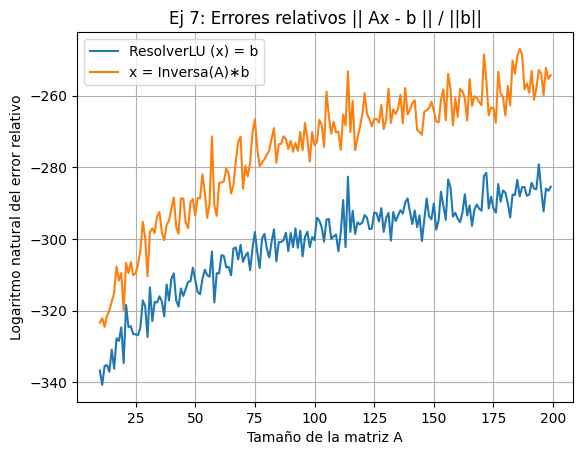

In [ ]:
#las variables con terminación '1' se utilizan para el método 'resolverLU' y las que terminan en '2', para el método de calcular la inversa
v1, v2 = np.zeros(200), np.zeros(200)      #definimos v1 y v2 como vectores de 200 ceros
for i in range(10,200):
  suma_errores_1, suma_errores_2 = 0, 0
  for j in range(10):
    A = np.random.rand(i,i) * 2 - np.ones((i,i))                        #definimos la matriz A de tamaño ixi y la x de tamaño i con i entre [10,200]
    x = np.random.rand(i).reshape(-1,1) * 2 - np.ones(i).reshape(-1,1)
    b = A @ x                                                           #Luego, b es el resultado de multiplicar la matriz A por x
    x1 = resolverLU(A, b)                          #x1 y x2 representan las dos maneras de resolver el sistema Ax=b
    error_log_1 = np.log(error_norma2(A, x1, b))   #error_log_1 y 2 guardan el log natural del error relativo (en norma dos) para x1 y x2 respectivamente
    x2 = inversa(A) @ b
    error_log_2 = np.log(error_norma2(A, x2, b))
    suma_errores_1 += error_log_1                  #se suman los resultados de error_log_1 y 2 para la matriz del mismo tamaño pero con números diferentes
    suma_errores_2 += error_log_2
  v1[i] = suma_errores_1           #v1[i] y v2[i] son la suma de los errores relativos para cada matriz de ixi,
  v2[i] = suma_errores_2           # cada cero de los vectores v1 y v2 va a ser reemplazado por el valor de suma_errores_1 y 2, respectivamente

#graficamos la suma de los errores a través de los diferentes métodos para cada n
n = np.arange(10, len(v1))
plt.plot(n, v1[10:], label= 'ResolverLU (x) = b')
plt.plot(n, v2[10:], label = 'x = Inversa(A)∗b')
plt.title('Ej 7: Errores relativos || Ax - b || / ||b||')
plt.ylabel('Logaritmo natural del error relativo') #definimos los títulos de los ejes
plt.xlabel('Tamaño de la matriz A')
plt.grid(True) #habilita las grillas en el gráfico
plt.legend()
plt.show()

El último gráfico compara los distintos valores de error relativo (en $ln$) para los dos mecanismos de resolución de $Ax=b$ tomando como datos de entrada $A \in R^{nxn}, b \in R^{n}$ para n en $[10,200]$ de números aleatorios en $[-1,1)$. \\
Se puede apreciar claramente que el método de calcular la inversa presenta mucho más error que el método de resolverLU, ya que la separación entre ambas funciones es considerable. También, notamos que la función naranja tiende a alejarse de la azul a medida que avanza hacia la derecha. Es decir, mientras más grande sea la matriz, mayor será la diferencia de error relativo entre un método y otro. \\
La mejor estrategia para resolver el sistema $Ax=b$ con mayor grado de precisión es, entonces, calculando la descomposición $LU$ y resolviendo las ecucaciones del tipo $resolverLU (x)=b$. \\
Para entender el motivo de esta diferencia, debemos analizar cómo funcionan las funciones resolverLU e inversa. La primera calcula la descomposición $LU$ de la matriz $A$, y luego los dos sistemas triangulares $Ly = b, Ux=y$. La segunda, por otro lado, también calcula la descomposición $LU$ de la matriz $A$, pero calcula $2n$ sistemas de ecuaciones lineales para el espacio $R^{n}$ correspondiente, ya que resuelve $n$ sistemas $Ly = e_i$ y $n$ sistemas, $Ux = y$. Además, luego debe realizar la multiplicación $A^{-1} b$, generando aún más error numérico. Así, es a priori esperable que el método de la inversa tenga un mayor error. Sin embargo, hay que destacar que no sería esperable que se genere el mismo error al resolver un sistema ampliado a algún vector aleatorio $b$ que al resolver un sistema ampliado al vector canónico, ya que el primero requeriría de más cuentas. Pero si sería esperable que se genere un mayor error al resolver $n$ sistemas ampliados a vectores canónicos, que un sistema ampliado a un vector $b \in R^{n} $ aleatorio. Es más, en definitiva, esto último es lo que estamos comparando: ¿cuesta más resolver $n$ sistemas ampliados a vectores canónicos, más la multiplicación $A^{-1} b$?¿O un sistema ampliado a un vector $b \in R^{n} $ aleatorio? Concluimos, al observar el gráfico analizado, que la primera genera más error, al menos para matrices y vectores aleatorios.

Ejercicio 8 \\
Consiste en repetir la experiencia del ejercicio anterior pero comparando los errores de las soluciones halladas y la original: \\
En vez de calcular el error como

\begin{equation} \frac{||A x -b||_2}{||b||_2} \end{equation}

se calcula de la siguiente manera:
\begin{equation} \frac{||x_i -x||_2}{||x||_2} \end{equation}


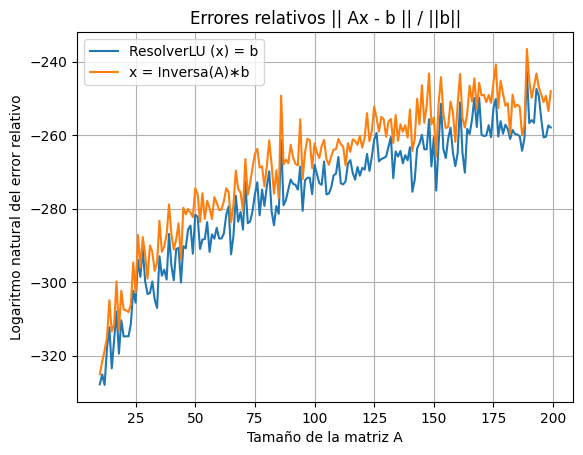

In [ ]:
#se repite el procedimiento del ejercicio anterior pero cambiando los parámetros de error_log_1 y 2
v1, v2 = np.zeros(200), np.zeros(200)
for i in range(10,200):
  suma_errores_1, suma_errores_2 = 0, 0
  for j in range(10):
    A = np.random.rand(i,i) * 2 - np.ones((i,i))
    x = np.random.rand(i).reshape(-1,1) * 2 - np.ones(i).reshape(-1,1)
    b = A @ x
    x1 = resolverLU(A, b)
    error_log_1 = np.log(norma2_vectorial(x1-x)/norma2_vectorial(x))    #en vez de calcular el error con la matriz A como en el ejercicio anterior,
    x2 = inversa(A) @ b                                                 # la resta en el numerador se realiza entre x1 o x2 (resultado experimental) y la x original (ya definida como parámetro) del sistema
    error_log_2 = np.log(norma2_vectorial(x2-x)/norma2_vectorial(x))
    suma_errores_1 += error_log_1
    suma_errores_2 += error_log_2
  v1[i] = suma_errores_1
  v2[i] = suma_errores_2


n = np.arange(10, len(v1))
plt.plot(n, v1[10:], label='ResolverLU (x) = b')
plt.plot(n, v2[10:], label = 'x = Inversa(A)∗b')
plt.title('Ej 8: Errores relativos || Ax - b || / ||b||')
plt.ylabel('Logaritmo natural del error relativo')
plt.xlabel('Tamaño de la matriz A')
plt.grid(True)
plt.legend()
plt.show()

Se observa un comportamiento parecido al del ejercicio anterior pero con algunas diferencias. \\
Lo primero que podemos ver de diferente es que las funciones naranja y azul no están tan distanciadas como antes. Es decir, no hay tanta diferencia de error entre un método y otro.
El método que sigue presentando más precisión sigue siendo $resolverLU(x)=b$ y, a veces, puede ocurrir que algunas matrices presenten menos error con el método de la inversa. Estos son casos aislados o especiales. \\
Si bien se supone que la $x$ experimental y la original debería tener el mismo valor, el gráfico muestra que armar esa $x$ experiemental conlleva distinto error si se arma con un método u otro. Esto demuestra que hasta en las igualdades menos complejas($x(calculada) = x(original)$) se tiene más o menos error relativo.

Ejercicio 9 \\
Este ejercicio pretende repetir el experimento del ejercicio 8 pero no está permitido llamar a mis funciones 'resolverLU' e 'inversa'. En su lugar, se deben emplear los comandos de python en numpy $np.linalg.solve$ (reemplaza a la función 'resolverLU') y $np.linalg.inv$ (reemplaza a la función 'inversa').

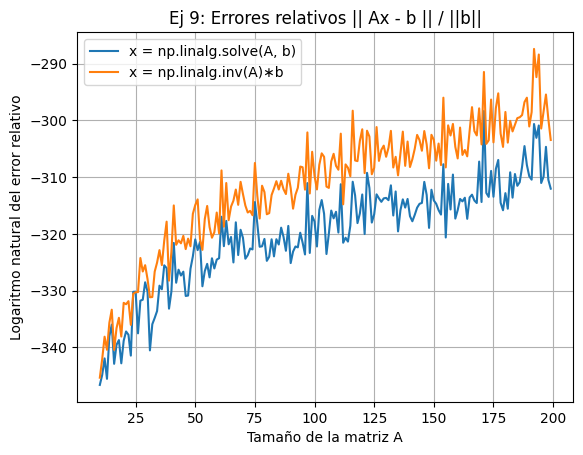

In [ ]:
#se repite el procedimiento del ejercicio anterior pero sin hacer uso de nuestras funciones 'resolverLU' o 'inversa'
v1, v2 = np.zeros(200), np.zeros(200)
for i in range(10,200):
  suma_errores_1, suma_errores_2 = 0, 0
  for j in range(10):
    A = np.random.rand(i,i) * 2 - np.ones((i,i))
    x = np.random.rand(i).reshape(-1,1) * 2 - np.ones(i).reshape(-1,1)
    b = A @ x
    x1 = np.linalg.solve(A, b)         #lo que antes se resolvía con nuestras funciones, ahora se resuelve con los comandos ya definidos de python
    error_log_1 = np.log(norma2_vectorial(x1-x)/norma2_vectorial(x))
    x2 = np.linalg.inv(A) @ b
    error_log_2 = np.log(norma2_vectorial(x2-x)/norma2_vectorial(x))
    suma_errores_1 += error_log_1
    suma_errores_2 += error_log_2
  v1[i] = suma_errores_1
  v2[i] = suma_errores_2


n = np.arange(10, len(v1))
plt.plot(n, v1[10:], label='x = np.linalg.solve(A, b)')
plt.plot(n, v2[10:], label = 'x = np.linalg.inv(A)∗b')
plt.title('Ej 9: Errores relativos || Ax - b || / ||b||')
plt.ylabel('Logaritmo natural del error relativo')
plt.xlabel('Tamaño de la matriz A')
plt.grid(True)
plt.legend()
plt.show()

Se observa casi el mismo comportamiento que el ejercicio 7 con las siguientes salvedades: \\
Las funciones presentan una diferencia de error muy pequeña para matrices relativamente chicas ($A \in R^{nxn}, n<25$). Si bien se sigue cumpliendo la tendencia de que a mayor tamaño de matriz, mayor diferencia de error entre ambos métodos, la diferencia en este caso para matrices grandes es menor a la del ejercicio 7 pero mayor a la del ejercicio 8. \\
Nuevamente, el método que presenta menos error es el de $resolverLU(x)$=b.

Ejercicio 10 \\
Consiste en repetir el ejercicio 7 pero para matrices con n en $[2,20]$ para $A \in R^{nxn}$ con la forma de la matriz de Hilbert y $b \in R^{n}$. \\
Para realizar esto, primero tuvimos que definir una función auxiliar 'matriz_H(n)' que devuelve una matriz de Hilbert de $nxn$. \\
Luego, simplemente se repiten los mismos pasos del ejercicio 7 y, además, se calcula el número de condición 2 de $A$

<ipython-input-15-adeb1b31a25d>:16: RuntimeWarning: divide by zero encountered in log
  error_log_1 = np.log(error_norma2(A, x1, b))
<ipython-input-15-adeb1b31a25d>:18: RuntimeWarning: divide by zero encountered in log
  error_log_2 = np.log(error_norma2(A, x2, b))


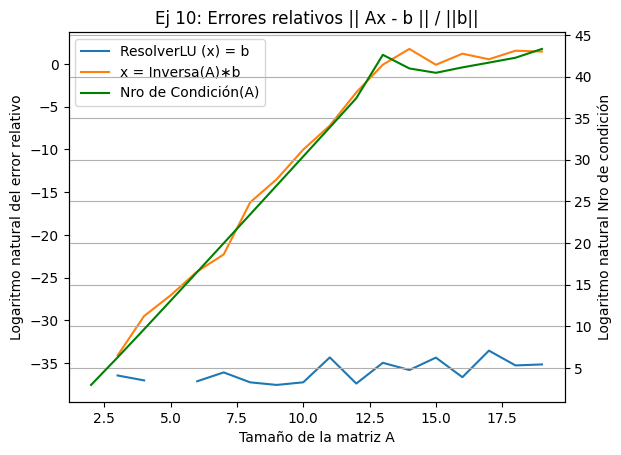

In [ ]:
#la función matriz_H devuelve la matriz de Hilbert dado un n natural.
def matriz_H(n):
    H = np.eye(n)    #trabajamos con la matriz identidad de nxn para recorrer una matriz del tamaño que se le ingrese como parámetro (n)
    for i in range(n):
        for j in range(n):
            H[i, j] = 1/(i+j+1)   #para cada posición i, j, la matriz de Hilbert se define como 1/i+j-1. en este caso hay un +1 porque i comienza en cero
    return H

#se repite el procedimiento del ejercicio 7 pero para una matriz particular (de Hilbert)
v1, v2, cond = np.zeros(20), np.zeros(20), np.zeros(20)
for i in range(2,20):
  A = matriz_H(i)
  x = np.random.rand(i).reshape(-1,1) * 2 - np.ones(i).reshape(-1,1)
  b = A @ x
  x1 = resolverLU(A, b)
  error_log_1 = np.log(error_norma2(A, x1, b))
  x2 = inversa(A) @ b
  error_log_2 = np.log(error_norma2(A, x2, b))
  v1[i] = error_log_1
  v2[i] = error_log_2
  cond[i] = np.log(np.linalg.cond(A))

n = np.arange(2, len(v1))

fig, axes = plt.subplots()

#las dos funciones que quiero comparar: 'resolverLU' e 'inversa'
line1, = axes.plot(n, v1[2:], label='ResolverLU (x) = b')
line2, = axes.plot(n, v2[2:], label='x = Inversa(A)∗b')

#título y nombre de los ejes
axes.set_title('Ej 10: Errores relativos || Ax - b || / ||b||')
axes.set_ylabel('Logaritmo natural del error relativo')
axes.set_xlabel('Tamaño de la matriz A')

#creamos otro eje vertical para poder considerar la diferente escala del número de condición y poder graficarlo
twin_axes = axes.twinx()

#se muestra en el mismo gráfico la variación del número de condición de A
line3, = twin_axes.plot(n, cond[2:], label='Nro de Condición(A)', color='g')
twin_axes.set_ylabel('Logaritmo natural Nro de condición')

#combinación de las tres etiquetas: 'resolverLU(x)=b', 'x=inversa(A)*b' y 'Nro de Condición(A)
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]

#se muestra la grilla y el plot
plt.grid(True)
axes.legend(lines, labels, loc='best')
plt.show()

Nuevamente, $resolverLU$ brinda un resultado más preciso.  \\
Observamos que el número de condición de la matriz crece muy rápido y, a medida que este crece, el error usando el método de la inversa también lo hace. Por el contrario, el método de resolverLU no crece o lo hace en una medida muy pequeña. \\
Así, concluimos que el método de resolución usando resolverLU es aun mejor para matrices con número de condición grande, especialmente al comprarlo con el método de la inversa.

Conclusiones Finales  \\



* En los ejercicios 4 y 6 estamos retornando el error relativo en norma dos del método 'resolverLU' y en norma Frobenius del método 'inversa', respectivamente para resolver el sistema $Ax=b$. El resultado de ambos errores debería ser cero por como están definidos los errores relativos en cada ejercicio (ya definidos en los encabezados de cada función). El resultado para ambas funciones es muy cercano a cero: un número con exponencial entre [-13,15]. El motivo por el cual creemos que los errores de ambos métodos no son tan distintos unos de otros es porque se trabaja con una matriz de $10x10$ que no es especialmente grande como para notar grandes diferencias en la implementación de un método y otro. Resulta oportuno que en la parte 2 de este trabajo se analicen los errores de cada método pero para matrices más grandes que las de $10x10$.
*   Si bien en todos los experimentos se observa que el método menos preciso (con menos error relativo) es el del cálculo de la inversa, ya sea a través de la función creada por nosotros, o la propia de numpy, se destaca que la diferencia es aún mayor cuando se trabaja con matrices de número de condición alto. Algo importante de destacar en los gráficos de los ejercicios 7, 8 y 9 es que las funciones tienden a disminuir su crecimiento a medida que el tamaño de la matriz aumenta. Es decir, el error relativo (para cualquier método) varía bastante si se compara una matriz de $25x25$ con una de $50x50$, pero no ocurre lo mismo comparando matrices de $175x175$ con $200x200$. \\
* Los valores del logaritmo natural del error que nos parecen asintóticos son (aproximadamente) -260, -250 y -300 para los gráficos de los ejercicios 7,8 y 9 respectivamnete. Los valores expuestos corresponden a los del método de la inversa ya que es el que presenta mayor error, de todas formas el comportamiento asintótico es recíproco para ambos métodos. Comparando esos valores, los que corresponden a los ejercicios 7 y 8 se parecen entre sí pero hay mucha diferencia con el valor del ejercicio 9 (es más preciso que el 8). Esto último se debe a que los comandos np.linalg.solve y np.linalg.inv tienen una forma de implementación óptima mientras que nuestras funciones funcionan como se espera pero no pueden superar la eficiencia de las funciones que vienen en numpy.
* Para el gráfico del ejercicio 10, los errores relativos de ambos métodos son los más grandes de todos los gráficos de los ejercicios anteriores. La diferencia de comportamiento de las funciones azul y naranja ya se explicó previamente. Que el error sea tan grande implica que la matriz de Hilbert presenta poca precisión cuando se la usa en un sistema del tipo $Ax=b$ por naturaleza. Esto se puede deber a que la forma de la matriz de Hilbert presenta bastante error relativo a la hora de armarse por la operacón de división que se debe realizar en cada posición de la matriz: $ H[i, j] = \frac{1}{(i+j+1)}$

* Entonces, en general, concluimos que nunca es conveniente resolver un sistema de ecuaciones lineales a partir del cálculo de la inversa.



